Google Drive location

In [ ]:
#Importing CSV File Needed Using Client Account
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

train_file_id = '1khvctmsWNBn80TJLonlCG_QgkVme4em0'
test_file_id = '1vcIHL3OufbwGhoFansX9R8plTLSDG2-y'

download = drive.CreateFile({'id': train_file_id})
download.GetContentFile('trainzodiac.csv')

download = drive.CreateFile({'id': test_file_id})
download.GetContentFile('testzodiac.csv')

Simple csv files extraction (Requires both files train and test csv on root folder)

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re

train = pd.read_csv('trainzodiac.csv' , header = 0, dtype={'zodiac': np.float64})
test  = pd.read_csv('testzodiac.csv' , header = 0, dtype={'zodiac': np.float64})
full_data = [train, test]

print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        299 non-null    object 
 1   recommender  299 non-null    object 
 2   blood        299 non-null    int64  
 3   zodiac       299 non-null    float64
 4   q1           299 non-null    int64  
 5   q2           299 non-null    int64  
 6   q3           299 non-null    int64  
 7   q4           299 non-null    int64  
 8   q5           299 non-null    int64  
 9   q6           299 non-null    int64  
 10  q7           299 non-null    int64  
 11  q8           299 non-null    int64  
 12  q9           299 non-null    int64  
 13  q10          299 non-null    int64  
 14  q11          299 non-null    int64  
 15  q12          299 non-null    int64  
dtypes: float64(1), int64(13), object(2)
memory usage: 37.5+ KB
None


Sample of the dataset

In [ ]:
df_table = pd.DataFrame(train)
df_table

,email,recommender,blood,zodiac,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,asd,Jojo,3,8.0,2,1,2,3,3,2,3,3,3,1,1,2
1,qwer,Jojo,4,5.0,1,1,2,1,1,3,1,3,3,2,3,3
2,qwe,Jojo,3,7.0,2,1,2,1,2,3,2,3,3,1,1,3
3,qwert,Jojo,1,5.0,1,1,2,1,2,3,3,2,2,1,2,3
4,dsfgj,Jojo,2,6.0,1,2,1,1,1,3,2,3,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,345657ur76i,Jojo,4,3.0,1,3,3,1,3,3,3,1,3,1,3,2
295,56847j674j4786,Jojo,1,3.0,3,2,2,1,2,1,2,2,2,2,1,3
296,6e4j5546h3,Jojo,2,1.0,2,3,1,1,2,3,3,3,2,1,3,1
297,s54reyt54r75ed76,Jojo,4,9.0,1,3,1,2,3,1,3,1,3,2,1,3


Correlation matrix of the raw dataset before preprocessing

In [ ]:
corr_matrix = df_table.corr()
corr_matrix["zodiac"].sort_values(ascending=False)

zodiac    1.000000
q10       0.153216
q1        0.052266
q9        0.030506
q4        0.022822
q12      -0.008964
blood    -0.011642
q7       -0.017277
q2       -0.025357
q11      -0.026136
q6       -0.037581
q8       -0.054374
q5       -0.059429
q3       -0.120308
Name: zodiac, dtype: float64

Checking survival rates for different groupings. Adding some of these groupings to the dataset as part of feature selection

In [ ]:
print (train[['blood', 'zodiac']].groupby(['blood'], as_index=False).mean())

    zodiac     blood
0      1.0  2.320000
1      2.0  2.263158
2      3.0  2.478261
3      4.0  2.500000
4      5.0  2.166667
5      6.0  2.458333
6      7.0  2.214286
7      8.0  2.531250
8      9.0  2.400000
9     10.0  2.185185
10    11.0  2.312500
11    12.0  2.368421


Preprocessing the data to normalize it into integers

In [ ]:
for dataset in full_data:
# Feature Selection
  drop_elements = ['email', 'recommender']
train = train.drop(drop_elements, axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))

train_aux = train
test_aux = test

train = train.values
test  = test.values

   blood  zodiac  q1  q2  q3  q4  q5  q6  q7  q8  q9  q10  q11  q12
0      3     8.0   2   1   2   3   3   2   3   3   3    1    1    2
1      4     5.0   1   1   2   1   1   3   1   3   3    2    3    3
2      3     7.0   2   1   2   1   2   3   2   3   3    1    1    3
3      1     5.0   1   1   2   1   2   3   3   2   2    1    2    3
4      2     6.0   1   2   1   1   1   3   2   3   2    1    2    2
5      1    12.0   1   3   1   2   1   2   2   2   3    2    1    3
6      4    12.0   3   2   1   1   2   2   1   2   2    3    3    1
7      4    10.0   1   2   1   3   3   2   1   2   2    2    2    2
8      3     2.0   3   1   2   2   1   3   3   1   2    1    1    1
9      1     7.0   1   2   1   2   2   2   2   1   3    3    1    1


Correlation Matrix after preprocessing:

In [ ]:
corr_matrix = train_aux.corr()
corr_matrix["blood"].sort_values(ascending=False)

zodiac    1.000000
q10       0.153216
q1        0.052266
q9        0.030506
q4        0.022822
q12      -0.008964
blood    -0.011642
q7       -0.017277
q2       -0.025357
q11      -0.026136
q6       -0.037581
q8       -0.054374
q5       -0.059429
q3       -0.120308
Name: zodiac, dtype: float64

Model training and testing for 4 different classifiers. No parameter fine tuning.

In [ ]:
import numpy as np

# Example y array
y = np.array([1., 2., 3., 4.])

# Map the unique values to the expected classes
class_map = {1.: 0, 2.: 1, 3.: 2, 4.: 3}
y_mapped = np.vectorize(class_map.get)(y)
y = y_mapped

<ipython-input-51-dd3011099a67>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-51-dd3011099a67>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-51-dd3011099a67>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
<ipython-input-51-dd3011099a67>:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


,Accuracy,Training Time (s),Testing Time (s),Total Time (s)
Classifier,,,,
XGBClassifier,0.226667,6.135337,6.205146,12.340483
SVC,0.266667,0.311758,0.321063,0.632820
DecisionTreeClassifier,0.233333,0.015144,0.016642,0.031786
RandomForestClassifier,0.246667,1.803127,1.912608,3.715734


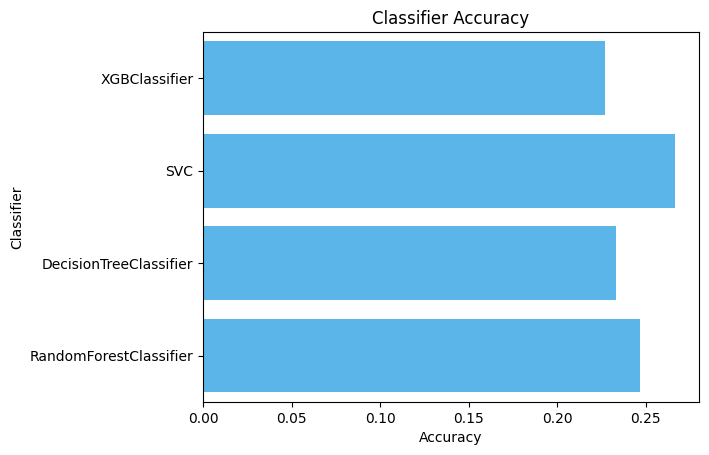

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = [    XGBClassifier(),    SVC(probability=True),    DecisionTreeClassifier(),    RandomForestClassifier()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[:, 1:]
y = train[:, 0] - 1 # subtract 1 from y

acc_dict = {}
timing_dict = {}
df = pd.DataFrame(columns=["Classifier", "Accuracy", "Training Time (s)", "Testing Time (s)", "Total Time (s)"])

for clf in classifiers:
	name = clf.__class__.__name__
	elapsed_train_time = []
	elapsed_test_time = []

	for train_index, test_index in sss.split(X, y):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		start_train_time = time.time()
		clf.fit(X_train, y_train)
		elapsed_train_time.append((time.time() - start_train_time))
	
		start_test_time = time.time()
		train_predictions = clf.predict(X_test)
		elapsed_test_time.append((time.time() - start_train_time))
	
		acc = accuracy_score(y_test, train_predictions)
	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

	
	sum_train_time = np.sum(elapsed_train_time)
	sum_test_time = np.sum(elapsed_test_time)
 
	timing_dict[name] = [sum_train_time,		                     sum_test_time,												 sum_train_time + sum_test_time]


for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	new_row = {"Classifier": clf, 
	           	"Accuracy": acc_dict[clf], 
							"Training Time (s)": timing_dict[clf][0],
							"Testing Time (s)": timing_dict[clf][1],
							"Total Time (s)": timing_dict[clf][2]}
	df = pd.concat([df, pd.DataFrame([new_row])])
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="#4bf")

df.set_index('Classifier', inplace=True)
df

XGBOOST HYPERPARAMETER TUNING

We found out that using XGBoost Hyperparameter Tuning by implementing Grid Search can improve the accuracy of the classifier.

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import sys

'''train = pd.read_csv("train.csv")
X = train.drop(['Survived','PassengerId'],axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
'''
#For classification 

#Random Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
'''random_search = RandomizedSearchCV(xgb_pipeline, param_distributions=params, n_iter=100,
                                   scoring='f1_weighted', n_jobs=4, verbose=3, random_state=1001 )
random_search.fit(X_train,y_train)'''
#OR

#Grid Search
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
gbm_param_grid = {
    'classifier__learning_rate': np.array([0.01,0.001]),
    'classifier__n_estimators': np.array([100,200,300,400]),
    'classifier__subsample': np.array([0.7,0.8,0.9]),
    'classifier__max_depth': np.array([10,11,12,13,14,15,16,17]),
    'classifier__lambda': np.array([1]),
    'classifier__gamma': np.array([0])
    #'classifier__colsample_bytree': np.arange(0,1.1,.2)
}

grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
                         scoring='f1_weighted', verbose=10)

grid_search.fit(X_train,y_train)

#Print out best parameters
'''print(random_search.best_params_)'''
print("Best Parameters", grid_search.best_params_)
#Print out scores on validation set
'''print(random_search.score(X_test,y_test))'''
print("Accuracy: ", grid_search.score(X_test,y_test))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters {'classifier__gamma': 0, 'classifier__lambda': 1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'classifier__subsample': 0.7}
Accuracy:  0.0980952380952381


DECISION TREE HYPERPARAMETER TUNING

We unconvered that declaring the range for min_samples_leaf and random_state parameters always resulted in 42 and 2 as best parameters, but also it was negatively impacting the accuracy for reasons we don't understand. We have removed them from the parameters.

Sometimes it lands 0.8 accuracy and sometimes 0.833

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

deciTree_parameters = {"max_depth": [3, 5, 7, 9, 11, 13]}

deciTree_GsCV =GridSearchCV(
		DecisionTreeClassifier(random_state=42, class_weight='balanced'),
		deciTree_parameters,
		cv=5,
		scoring='accuracy'
	)

deciTree_grid_search = deciTree_GsCV
deciTree_grid_search.fit(X_train,y_train)

print("Best Parameters", deciTree_grid_search.best_params_)
print("Accuracy: ", deciTree_grid_search.score(X_test,y_test))

Best Parameters {'max_depth': 5}
Accuracy:  0.13333333333333333


RANDOM FOREST HYPERPARAMETER TUNING

Sometimes it lands 0.8 accuracy and sometimes 0.833

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


ranFor_hyperParams = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

ranFor_GsCV =RandomizedSearchCV(
		RandomForestClassifier(random_state=42, class_weight='balanced'),
		param_distributions = ranFor_hyperParams,
		n_iter = 100, cv = 3, 
    verbose=2, 
    random_state=42, 
    n_jobs = -1
	)

ranFor_grid_search = deciTree_GsCV
ranFor_grid_search.fit(X_train,y_train)

print("Best Parameters", ranFor_grid_search.best_params_)
print("Accuracy: ", ranFor_grid_search.score(X_test,y_test))

Best Parameters {'max_depth': 5}
Accuracy:  0.13333333333333333


SVC HYPERPARAMETER TUNING

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

from sklearn.model_selection import GridSearchCV
  
# defining parameter range ORIGINAL
"""param_grid = {'C': list(np.arange(0.1, 1, 0.1)), 
              'gamma': list(np.arange(0.1, 1, 0.1)),
              'kernel': ['rbf']}"""

#TEST
param_grid = {'C': [round(num, 2) for num in list(np.arange(0.1, 1, 0.05))], 
              'gamma': [round(num, 2) for num in list(np.arange(0.1, 1, 0.05))],
              'kernel': ['rbf']}
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)


# print best parameter after tuning
print("Best Params after Tuning: ", grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print("Best Estimator after Tuning: ", grid.best_estimator_)


grid_predictions = grid.predict(X_test)
  
# print classification report
print("Report: ", classification_report(y_test, grid_predictions))
print("Accuracy :", grid.score(X_test, y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.38      1.00      0.55         9
         1.0       0.00      0.00      0.00         7
         2.0       0.20      0.12      0.15         8
         3.0       0.00      0.00      0.00         6

    accuracy                           0.33        30
   macro avg       0.14      0.28      0.17        30
weighted avg       0.17      0.33      0.20        30

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.315 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.315 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.315 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.296 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.302 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.15, kernel=rbf;, score=0.315 total time=   0.0s
[CV 2/5] END ..

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
####################
### EXPERIMENTAL ###
####################
"The Code Below is VERY COARSE and is NOT Intended to be Presented YET."

'The Code Below is VERY COARSE and is NOT Intended to be Presented YET.'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

classifiers = [
    XGBClassifier(),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[:, 1:]
y = train[:, 0]

acc_dict = {}
timing_dict = {}
df = pd.DataFrame(columns=["Classifier", "Accuracy", "Training Time (s)", "Testing Time (s)", "Total Time (s)"])

for clf in classifiers:
	name = clf.__class__.__name__
	elapsed_train_time = []
	elapsed_test_time = []

	for train_index, test_index in sss.split(X, y):
		X_train, X_test = X[train_index], X[test_index]
		y_train, y_test = y[train_index], y[test_index]

		start_train_time = time.time()
		clf.fit(X_train, y_train)
		elapsed_train_time.append((time.time() - start_train_time))
	
		start_test_time = time.time()
		train_predictions = clf.predict(X_test)
		elapsed_test_time.append((time.time() - start_train_time))
	
		acc = accuracy_score(y_test, train_predictions)
	
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

	
	sum_train_time = np.sum(elapsed_train_time)
	sum_test_time = np.sum(elapsed_test_time)
 
	timing_dict[name] = [sum_train_time,
		                     sum_test_time,
												 sum_train_time + sum_test_time]


for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	new_row = {"Classifier": clf, 
	           	"Accuracy": acc_dict[clf], 
							"Training Time (s)": timing_dict[clf][0],
							"Testing Time (s)": timing_dict[clf][1],
							"Total Time (s)": timing_dict[clf][2]}
	df = pd.concat([df, pd.DataFrame([new_row])])
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="#4bf")

df.set_index('Classifier', inplace=True)
df

ValueError: ignored